## 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on notebook 03 of the Learn PyTorch for Deep Learning course: https://www.learnpytorch.io/03_pytorch_computer_vision/

2. See a live walkthrough of the solutions (errors and all) on YouTube: https://youtu.be/_PibmqpEyhA

    - **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.

3. See other solutions on the course GitHub: https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions

In [1]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else (
    "mps" if torch.mps.is_available() else "cpu"
)

2.7.1


## 5. Load the torchvision.datasets.MNIST() train and test datasets.

In [2]:
# Import dependencies
from torchvision import datasets
from torchvision.transforms import ToTensor

# Create training dataset
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None,
)

# Create testing dataset
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None,
)

In [3]:
# Check length
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# Check sample shape
train_data.data[0].shape

torch.Size([28, 28])

In [5]:
# Check data type
train_data.data[0].dtype

torch.uint8

In [6]:
# Show sample data
train_data.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
           0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
          36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,
         102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [7]:
# Show sample label
train_data.targets[0]

tensor(9)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [8]:
# Create labels list
labels = list(train_data.class_to_idx.keys())
labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

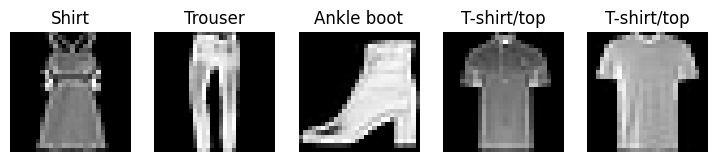

In [9]:
# Visualize 5 random data sample
import random
import matplotlib.pyplot as plt

# Create random seed for reproducibility
random.seed(42)

fig = plt.figure(figsize=(9, 9))
rows, cols = 1, 5

for i in range(1, 6):
    idx = random.choice(range(len(train_data)))
    
    fig.add_subplot(rows, cols, i)
    plt.imshow(train_data.data[idx], cmap="gray")
    plt.title(labels[train_data.targets[idx]])
    plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [10]:
# Ensure all data is float32
train_data.data = train_data.data.to(torch.float32)
test_data.data = test_data.data.to(torch.float32)

In [11]:
from torch.utils.data import DataLoader

# Set global variable
BATCH_SIZE=32

# Create train dataloader
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

# Create test dataloader
test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

In [12]:
# Check length
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [13]:
# Check length * batch size
len(train_dataloader) * BATCH_SIZE, len(test_dataloader) * BATCH_SIZE

(60000, 10016)

## 8. Recreate `model_2` used in notebook 03 (the same model from the CNN Explainer website, also known as TinyVGG) capable of fitting on the MNIST dataset.

In [14]:
import torch
from torch import nn

# Create model
class FMNISTModelExercise(nn.Module):
    
    def __init__(self, in_features: int, out_features: int, hidden_units: int):
        super().__init__()
        
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=in_features,
                out_channels=hidden_units,
                kernel_size=(3, 3),
                stride=1,
                padding=1,
            ),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=(3, 3),
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            
            nn.MaxPool2d(
                kernel_size=(2, 2),
                stride=2,
            ),
        )
        
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=(3, 3),
                stride=1,
                padding=1,
            ),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=(3, 3),
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=(3, 3),
                stride=1,
                padding=1,
            ),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=(3, 3),
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            
            nn.MaxPool2d(
                kernel_size=(2, 2),
                stride=2,
            ),
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(
                in_features=hidden_units * 7 * 7,
                out_features=out_features,
            ),
        )
        
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        z1 = self.conv_block_1(x)
        z2 = self.conv_block_2(z1)
        z3 = self.classifier(z2)
        
        return z3

In [15]:
# Create cpu model instance
model_cpu = FMNISTModelExercise(
    in_features = 1,
    out_features=len(labels),
    hidden_units=64,
).to("cpu")

model_cpu

FMNISTModelExercise(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): ReLU()
    (3): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=10, bias=True)
  )
)

In [16]:
# Create mps model instance
model_mps = FMNISTModelExercise(
    in_features = 1,
    out_features=len(labels),
    hidden_units=64,
).to("mps")

model_mps

FMNISTModelExercise(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): ReLU()
    (3): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [17]:
# Create loss function, optimizer and evaluation metrics
loss_fn_cpu = nn.CrossEntropyLoss()

optimizer_cpu = torch.optim.SGD(
    params=model_cpu.parameters(),
    lr=0.1,
)

loss_fn_mps = nn.CrossEntropyLoss()

optimizer_mps = torch.optim.SGD(
    params=model_mps.parameters(),
    lr=0.1,
)

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = correct / len(y_pred) * 100
    return acc

In [18]:
accuracy_fn, loss_fn_cpu, optimizer_cpu

(<function __main__.accuracy_fn(y_true, y_pred)>,
 CrossEntropyLoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.1
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [19]:
accuracy_fn, loss_fn_mps, optimizer_mps

(<function __main__.accuracy_fn(y_true, y_pred)>,
 CrossEntropyLoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.1
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [20]:
# Create train step function
def train_step(
    model: nn.Module,
    data_loader: torch.utils.data.DataLoader,
    optimizer: torch.optim.Optimizer,
    loss_fn: nn.Module,
    accuracy_fn,
    device="cpu"
) -> None:
    """Performs training with model"""
    train_loss, train_acc = 0, 0
    
    # Put model on target device
    model = model.to(device)
    
    for X_train, y_train in data_loader:
        # Put data on target device and unsqueeze
        X_train, y_train = X_train.to(device), y_train.to(device)
        
        # Turn on training mode
        model.train()
        
        # 1. Forward pass
        y_pred = model(X_train)
        
        # 2.1. Calculate loss
        loss = loss_fn(y_pred, y_train)
        train_loss += loss.item()
        
        # 2.2. Calculate acc
        acc = accuracy_fn(
            y_true=y_train, 
            y_pred=y_pred.argmax(dim=1) # logits -> prediction probabilities
        )
        train_acc += acc
        
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        
        # 4. Loss backwards
        loss.backward()
        
        # 5. Optimizer step
        optimizer.step()        
    
    # Divide total train loss and acc by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    
    # Print out what's happening
    print(f"\nTrain loss: {train_loss:.4} | Train acc: {train_acc:.4}%\n")

In [21]:
# Create test step function
def test_step(
    model: nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: nn.Module,
    accuracy_fn,
    device="cpu"
) -> None:
    """Performs testing with model"""
    test_loss, test_acc = 0, 0
    
    # Put model on target device
    model = model.to(device)
    
    # Turn on evaluation mode
    model.eval()
    
    with torch.inference_mode():
        for X_test, y_test in data_loader:
            # Put data on target device and unsqueeze
            X_test, y_test = X_test.to(device), y_test.to(device)
            
            # 1. Forward pass
            y_pred = model(X_test)
            
            # 2.1 Calculate loss
            test_loss += loss_fn(y_pred, y_test).item()
            
            # 2.2 Calculate accuracy
            test_acc += accuracy_fn(
                y_true=y_test,
                y_pred=y_pred.argmax(dim=1) # logits -> prediction labels
            )

        # Divide total train loss and acc by length of train dataloader
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
    
    # Print out what's happening
    print(f"\nTest loss: {test_loss:.4f} | Test acc: {test_acc:.4f}%\n")

In [22]:
from timeit import default_timer as timer
from tqdm.auto import tqdm

# Measure time
start_time_mps = timer()

# Set seed
torch.manual_seed(42)

# Set epochs
epochs = 3

# Create an optimiziation and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n")
    
    train_step(
        model=model_mps,
        data_loader=train_dataloader,
        loss_fn=loss_fn_mps,
        optimizer=optimizer_mps,
        accuracy_fn=accuracy_fn,
        device="mps",
    )
    
    test_step(
        model=model_mps,
        data_loader=test_dataloader,
        loss_fn=loss_fn_mps,
        accuracy_fn=accuracy_fn,
        device="mps",
    )

# Measure time
end_time_mps = timer()

# Calculate time
time_mps = end_time_mps - start_time_mps
print(f"\nTrain time on mps: {time_mps:.3f} seconds")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0


Train loss: 1.287 | Train acc: 50.45%


Test loss: 0.8901 | Test acc: 64.1474%

Epoch: 1


Train loss: 0.8529 | Train acc: 65.98%


Test loss: 0.8507 | Test acc: 65.9844%

Epoch: 2


Train loss: 0.7933 | Train acc: 68.11%


Test loss: 0.8244 | Test acc: 67.7117%


Train time on mps: 131.448 seconds


In [23]:
from timeit import default_timer as timer
from tqdm.auto import tqdm

# Measure time
start_time_cpu = timer()

# Set seed
torch.manual_seed(42)

# Set epochs
epochs = 3

# Create an optimiziation and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n")
    
    train_step(
        model=model_cpu,
        data_loader=train_dataloader,
        loss_fn=loss_fn_cpu,
        optimizer=optimizer_cpu,
        accuracy_fn=accuracy_fn,
        device="cpu",
    )
    
    test_step(
        model=model_cpu,
        data_loader=test_dataloader,
        loss_fn=loss_fn_cpu,
        accuracy_fn=accuracy_fn,
        device="cpu",
    )

# Measure time
end_time_cpu = timer()

# Calculate time
time_cpu = end_time_cpu - start_time_cpu
print(f"\nTrain time on cpu: {time_cpu:.3f} seconds")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0


Train loss: 1.612 | Train acc: 37.51%


Test loss: 0.9221 | Test acc: 63.4485%

Epoch: 1


Train loss: 0.868 | Train acc: 65.36%


Test loss: 0.8483 | Test acc: 66.5435%

Epoch: 2


Train loss: 0.7968 | Train acc: 68.0%


Test loss: 0.8130 | Test acc: 67.9613%


Train time on cpu: 750.909 seconds


In [24]:
def eval_model(
    model: nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: nn.Module,
    accuracy_fn,
    device="cpu",
) -> dict:
    """Perform evaluation on test dataset"""
    test_loss, test_acc = 0, 0
    
    start_time = timer()
    
    # Turn on evaluation mode
    model.eval()
    
    # Turn on inference mode
    with torch.inference_mode():
        for X_test, y_test in data_loader:
            # Put data on target device and unsqueeze
            X_test, y_test = X_test.to(device), y_test.to(device)
            
            # 1. Forward pass
            y_pred = model(X_test)
            
            # 2.1 Calculate loss
            test_loss += loss_fn(y_pred, y_test).item()
            
            # 2.2 Calculate accuracy
            test_acc += accuracy_fn(
                y_true=y_test,
                y_pred=y_pred.argmax(dim=1) # logits -> prediction labels
            )

        # Divide total train loss and acc by length of train dataloader
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
    
    end_time = timer()
    
    return {
        "name": model.__class__.__name__,
        "test_loss": test_loss,
        "test_acc": test_acc,
        "test_time": end_time-start_time
    }

In [25]:
# Evaluate cpu model
cpu_model_eval = eval_model(
    model=model_cpu,
    data_loader=test_dataloader,
    loss_fn=loss_fn_cpu,
    accuracy_fn=accuracy_fn,
    device="cpu"
)

cpu_model_eval

{'name': 'FMNISTModelExercise',
 'test_loss': 0.8130359296410229,
 'test_acc': 67.96126198083067,
 'test_time': 10.700046708996524}

In [26]:
# Evaluate mps model
mps_model_eval = eval_model(
    model=model_mps,
    data_loader=test_dataloader,
    loss_fn=loss_fn_cpu,
    accuracy_fn=accuracy_fn,
    device="mps"
)

mps_model_eval

{'name': 'FMNISTModelExercise',
 'test_loss': 0.8243674772044721,
 'test_acc': 67.71166134185303,
 'test_time': 4.148564916002215}

In [27]:
import pandas as pd

model_eval = pd.DataFrame([cpu_model_eval, mps_model_eval]).set_index("name")

model_eval

,test_loss,test_acc,test_time
name,,,
FMNISTModelExercise,0.813036,67.961262,10.700047
FMNISTModelExercise,0.824367,67.711661,4.148565


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [28]:
def make_predictions(
    model: nn.Module,
    dataset,
    labels,
    device="cpu"
) -> None:
    """Visualizes 5 random predictions from the dataset using the trained model."""
    # random.seed(42)

    model.eval()
    model.to(device)
    
    fig = plt.figure(figsize=(12, 4))

    for i in range(5):
        idx = random.randint(0, len(dataset) - 1)
        img, true_label = dataset[idx]  # img shape: [1, 28, 28]
        img = img.to(device)

        # Add batch dimension: [1, 1, 28, 28]
        img_batch = img.unsqueeze(0)

        with torch.inference_mode():
            pred_logits = model(img_batch)
            pred_label = pred_logits.argmax(dim=1).item()

        ax = fig.add_subplot(1, 5, i + 1)
        ax.imshow(img.squeeze().cpu().numpy(), cmap="gray")
        ax.set_title(
            f"Pred: {labels[pred_label]}\nTrue: {labels[true_label]}",
            fontsize=10,
            color="g" if pred_label == true_label else "r"
        )
        ax.axis("off")
    plt.show()

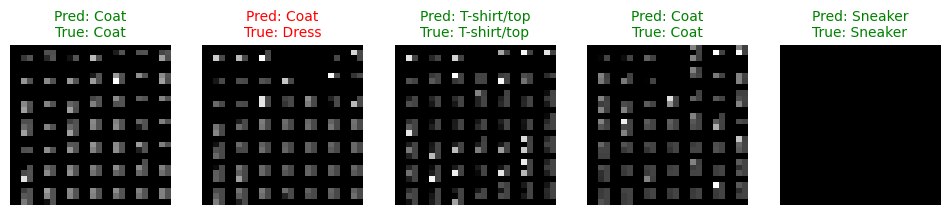

In [29]:
make_predictions(
    model=model_mps, 
    dataset=test_data, 
    labels=labels, 
    device="mps"
    )

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [30]:
from mlxtend.plotting import plot_confusion_matrix
import mlxtend
print(mlxtend.__version__)

from torchmetrics import ConfusionMatrix
import torchmetrics
print(torchmetrics.__version__)

0.23.4
1.7.4


In [31]:
device = "mps"

# 1. Make predictions with trained model
y_preds = []
model_mps.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions..."):
        # Send the data and targets to target device
        X, y = X.to(device), y.to(device)

        # Do the forward pass
        y_logits = model_mps(X)
        
        # Turn predictions from logits -> prediction probabilites -> prediction labels
        y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
        
        # Put prediction on CPU for evaluation
        y_preds.append(y_pred.cpu())
    
# Concatenate list of predictions into a tensor
# print(y_preds[:5])
y_pred_tensor = torch.cat(y_preds)
print(y_pred_tensor[:5])

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([7, 2, 1, 1, 2])


In [32]:
# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(labels), task="multiclass", )
confmat_tensor = confmat(
    preds=y_pred_tensor,
    target=test_data.targets
)

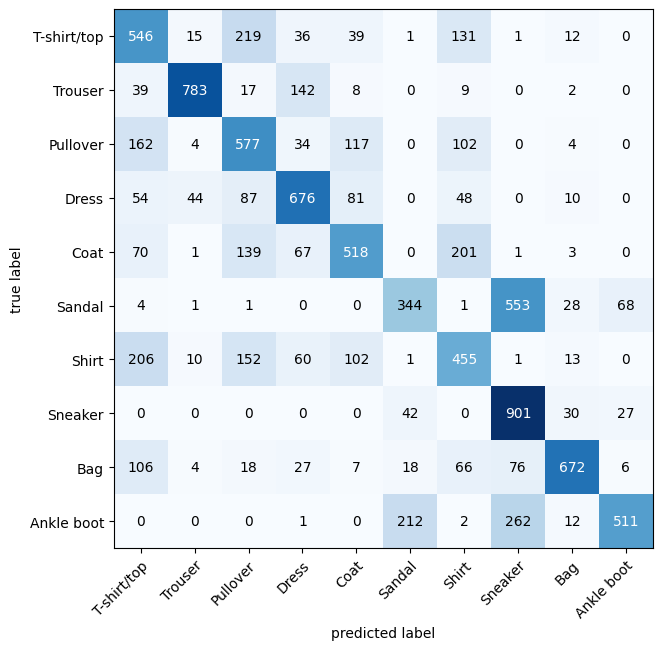

In [33]:
# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names=labels,
    figsize=(10, 7)
)